In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:

from helpers import load_result_table,plot_metric_matrix, plot_mm_grid
table = load_result_table(formatter="{AU}_{EU}_1",epoch=500,
                           loop_params = {
                            "AU": ["softmax", "ssn", "diffusion", "prob_unet"],
                            "EU": ["swag", "dropout", "swag_diag", "none", "ensemble"]
                },
                save_path = "/home/jloch/Desktop/diff/luzern/values/saves/chaksu128/test_results/",
                aggregation_type = "patch_level")
print(table.shape)
print(table.columns)

Skipping missing version: softmax_none_1
(19, 22)
Index(['AU', 'EU', 'version', 'val_dice', 'val_ged', 'val_ged_bma', 'id_dice',
       'id_ged', 'id_ged_bma', 'EU_ncc', 'AU_ncc', 'TU_ncc', 'EU_ace',
       'AU_ace', 'TU_ace', 'EU_auc', 'AU_auc', 'TU_auc', '(AU-EU)_ncc',
       '(EU-AU)_auc', 'min(AU,EU)_ace', '(TU-min(AU,EU))_ace'],
      dtype='object')


In [4]:
max_col_chars = max([len(col) for col in table.columns])
for col in table.columns:
    print(f"{col:{max_col_chars}} : {type(table[col].iloc[0])} ")

AU                  : <class 'str'> 
EU                  : <class 'str'> 
version             : <class 'str'> 
val_dice            : <class 'numpy.float64'> 
val_ged             : <class 'numpy.float64'> 
val_ged_bma         : <class 'numpy.float64'> 
id_dice             : <class 'numpy.float64'> 
id_ged              : <class 'numpy.float64'> 
id_ged_bma          : <class 'numpy.float64'> 
EU_ncc              : <class 'dict'> 
AU_ncc              : <class 'dict'> 
TU_ncc              : <class 'dict'> 
EU_ace              : <class 'dict'> 
AU_ace              : <class 'dict'> 
TU_ace              : <class 'dict'> 
EU_auc              : <class 'dict'> 
AU_auc              : <class 'dict'> 
TU_auc              : <class 'dict'> 
(AU-EU)_ncc         : <class 'dict'> 
(EU-AU)_auc         : <class 'dict'> 
min(AU,EU)_ace      : <class 'dict'> 
(min(AU,EU)-TU)_ace : <class 'dict'> 


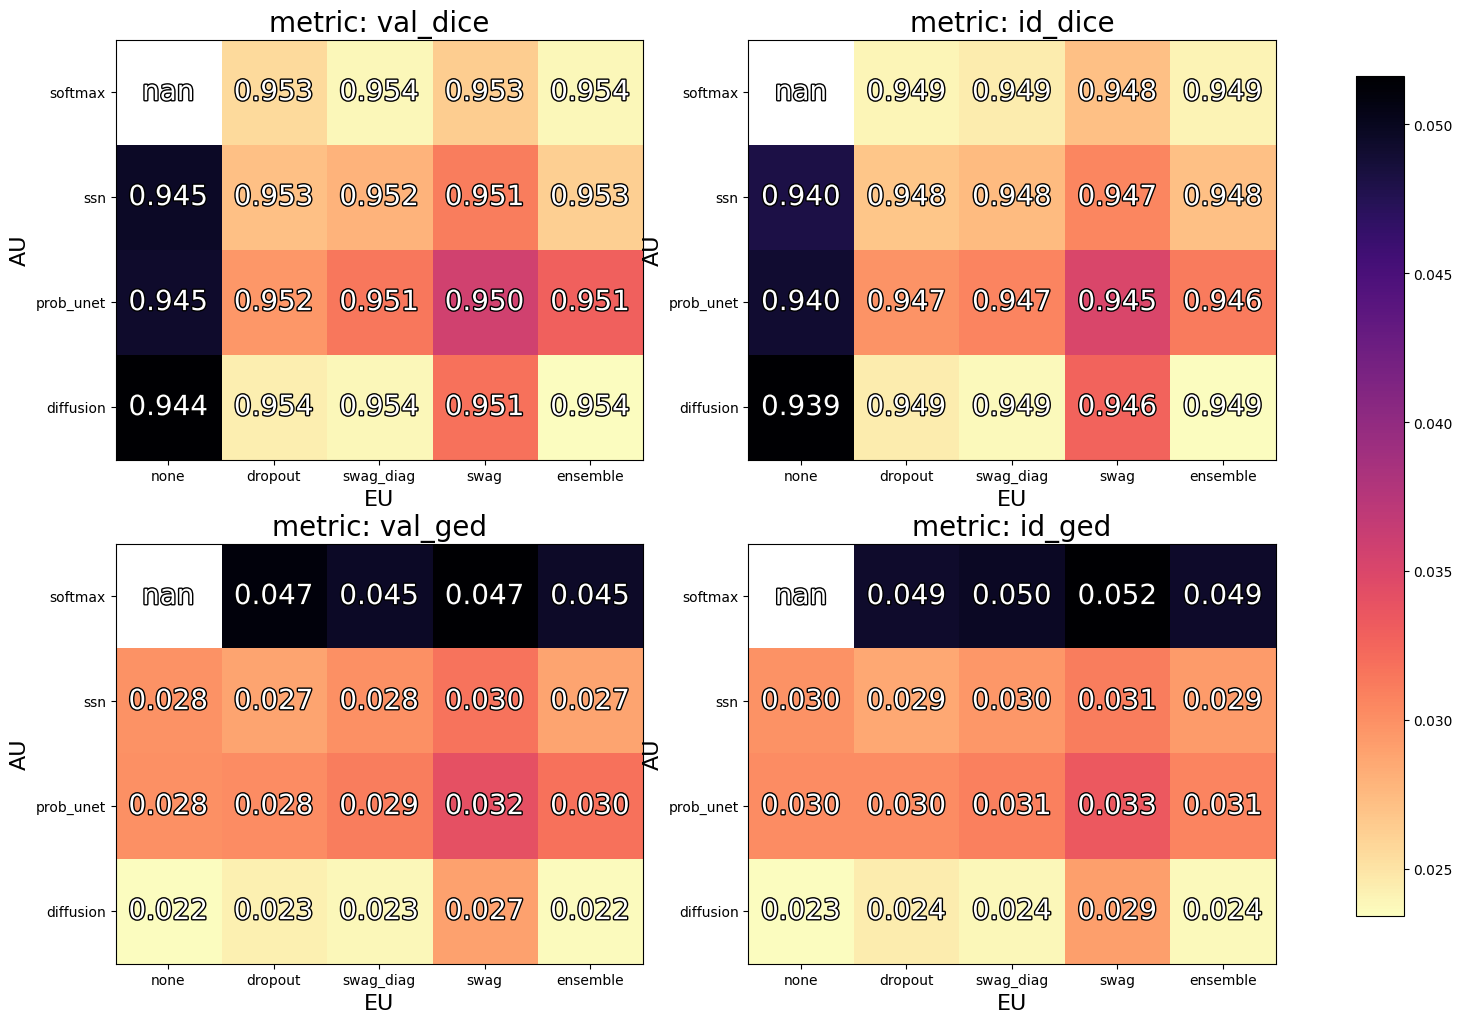

In [5]:
# RAW METRICS
from helpers import plot_metric_matrix, plot_mm_grid
out = plot_mm_grid(table)

# chaksu

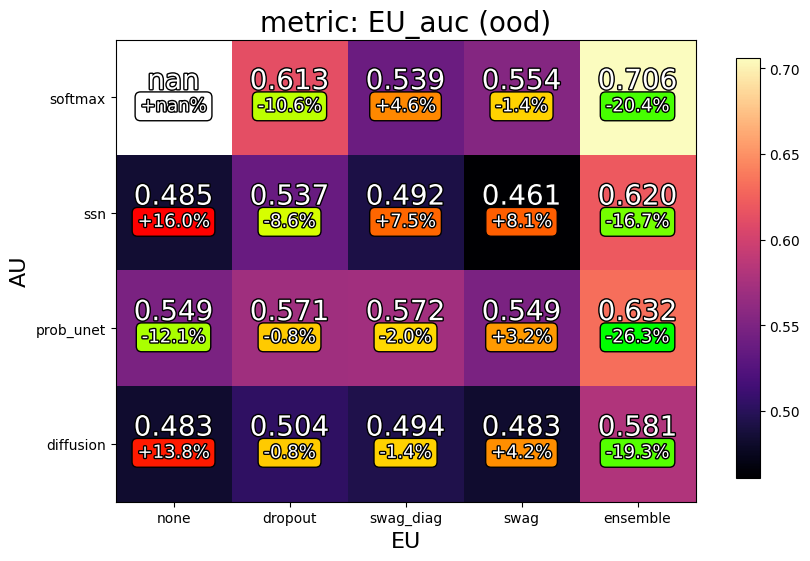

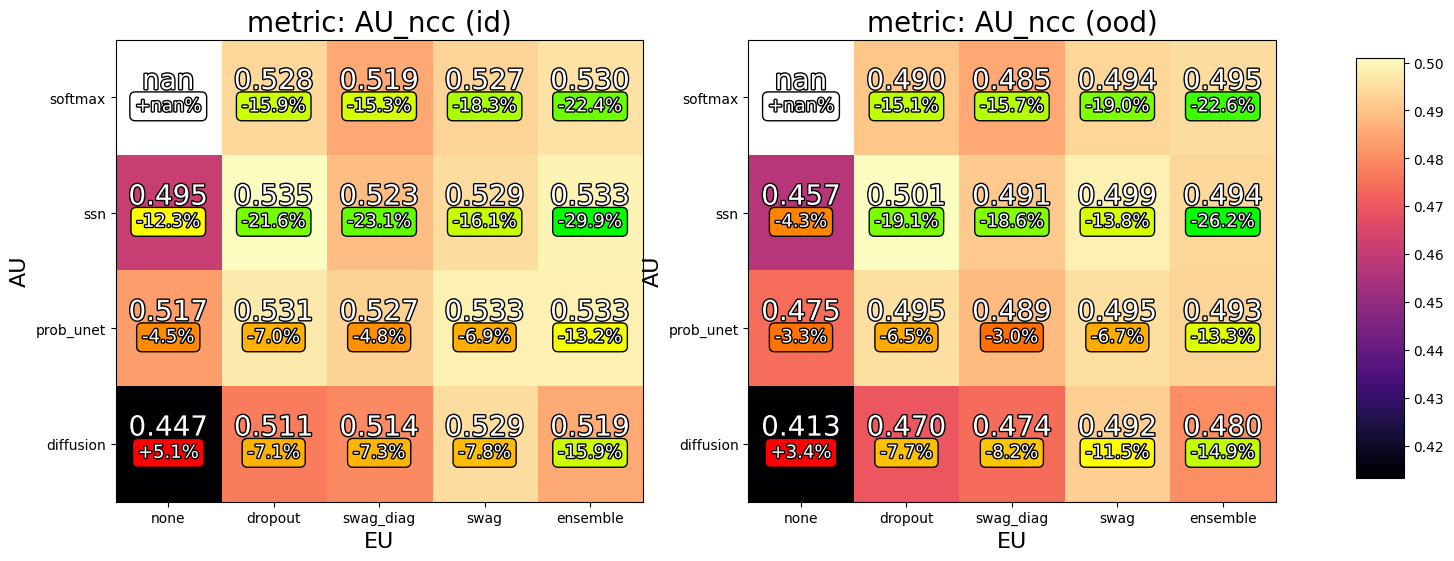

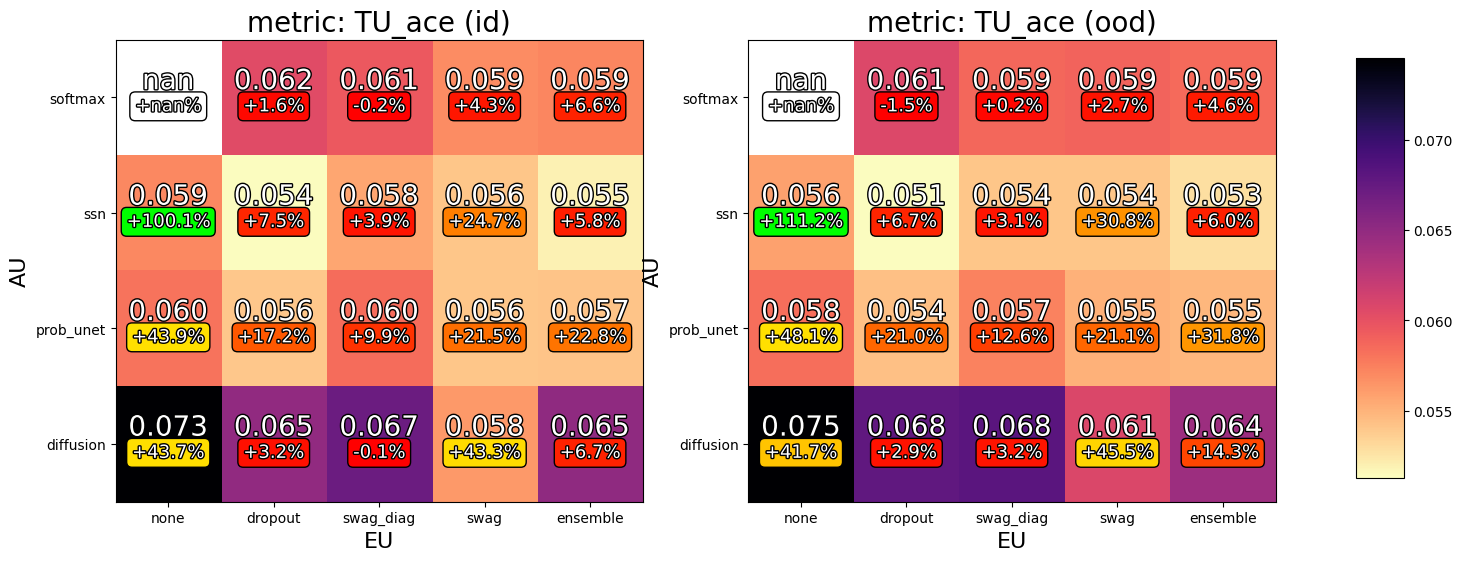

In [9]:
# UQ chaksu64
from helpers import plot_metric_matrix, plot_mm_grid
#plot_metric_matrix(table,metric="EU_auc",reldiff="(EU-AU)_auc",subkey="ood",cbar_keys=["EU_auc","AU_auc"])
plot_mm_grid(table,kwarg_grid=[[{"metric":"EU_auc","reldiff":"(EU-AU)_auc","subkey":"ood"}]])
                              #{"metric":"AU_auc","subkey":"ood", "cbar_keys": ["EU_auc","AU_auc"]}]])
plot_mm_grid(table,kwarg_grid=[[{"metric":"AU_ncc","reldiff":"(AU-EU)_ncc","subkey":"id"},
                              {"metric":"AU_ncc","reldiff":"(AU-EU)_ncc","subkey":"ood"}]])
#plot_metric_matrix(table,metric="TU_ace",reldiff="(min(AU,EU)-TU)_ace",subkey="ood",cbar_keys=["TU_ace"])
plot_mm_grid(table,kwarg_grid=[[{"metric":"TU_ace","reldiff":"(TU-min(AU,EU))_ace","subkey":"id"},
                                {"metric":"TU_ace","reldiff":"(TU-min(AU,EU))_ace","subkey":"ood"}]]);

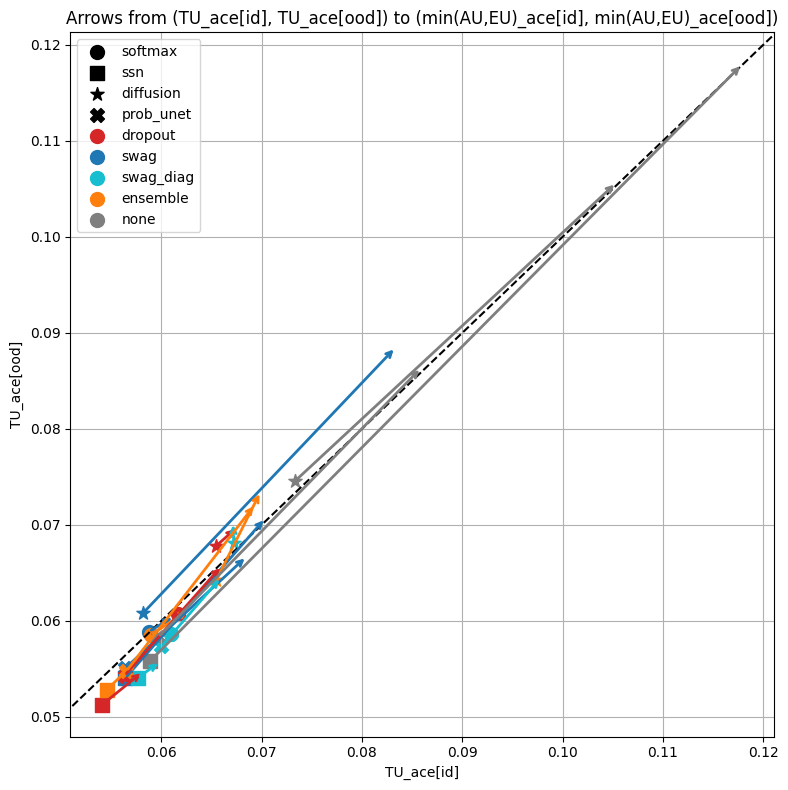

In [10]:
from helpers import plot_4_stat_arrows
plot_4_stat_arrows(table,add_xy=True)


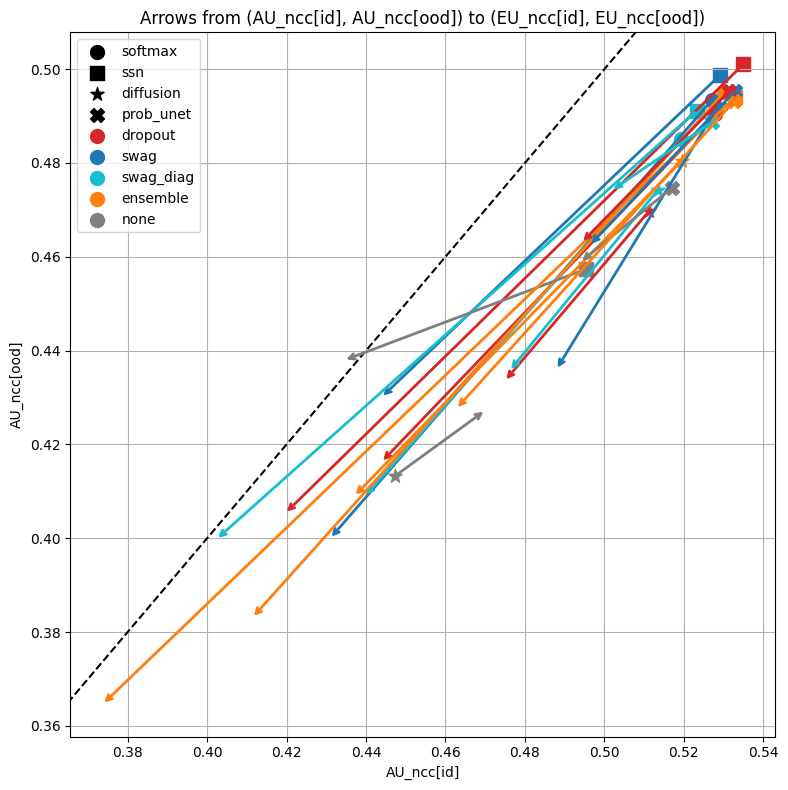

In [11]:
from helpers import plot_4_stat_arrows
plot_4_stat_arrows(table,x1="AU_ncc[id]",y1="AU_ncc[ood]",x2="EU_ncc[id]",y2="EU_ncc[ood]")


Text(0.5, 25.722222222222214, 'AU ACE')

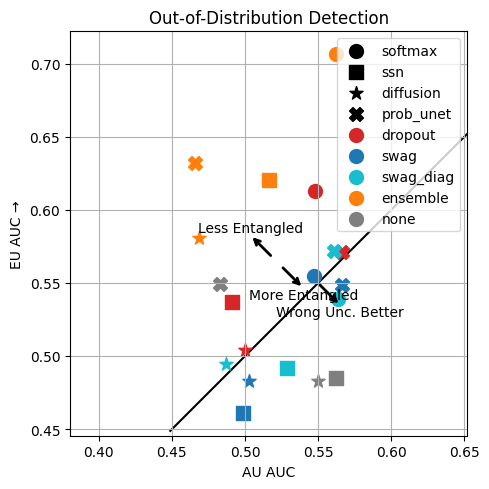

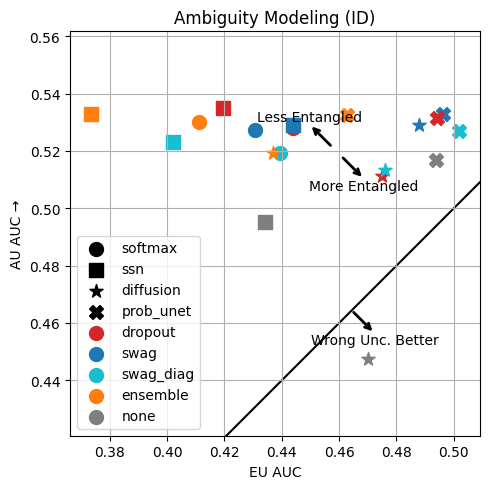

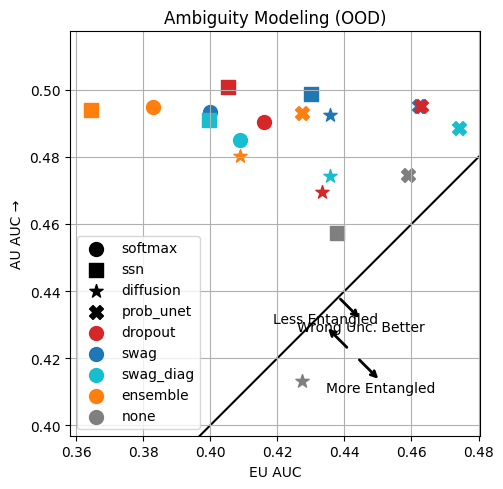

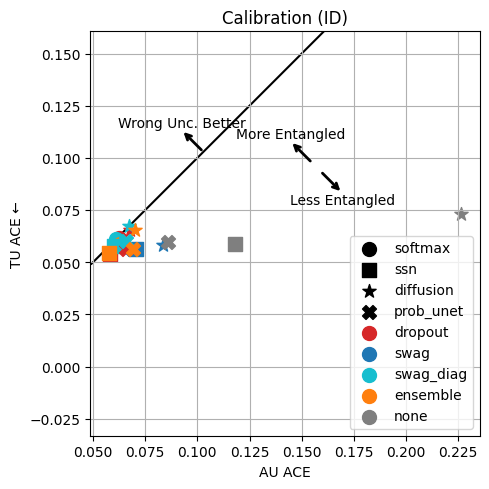

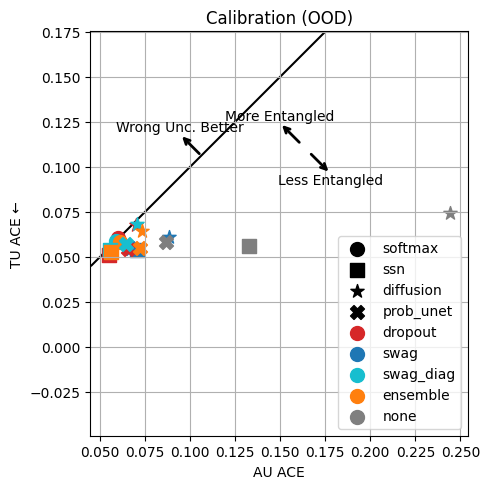

In [22]:
from helpers import model_scatter
import matplotlib.pyplot as plt
model_scatter(table)
plt.title("Out-of-Distribution Detection")
plt.ylabel("EU AUC \u2192")
plt.xlabel("AU AUC")
model_scatter(table,x="EU_ncc[id]",y="AU_ncc[id]")
plt.title("Ambiguity Modeling (ID)")
plt.ylabel("AU AUC \u2192")
plt.xlabel("EU AUC")
model_scatter(table,x="EU_ncc[ood]",y="AU_ncc[ood]")
plt.title("Ambiguity Modeling (OOD)")
plt.ylabel("AU AUC \u2192")
plt.xlabel("EU AUC")
model_scatter(table,x="AU_ace[id]",y="TU_ace[id]",entangle_is_up=True)
plt.title("Calibration (ID)")
plt.ylabel("TU ACE \u2190")
plt.xlabel("AU ACE")
model_scatter(table,x="AU_ace[ood]",y="TU_ace[ood]",entangle_is_up=True)
plt.title("Calibration (OOD)")
plt.ylabel("TU ACE \u2190")
plt.xlabel("AU ACE")

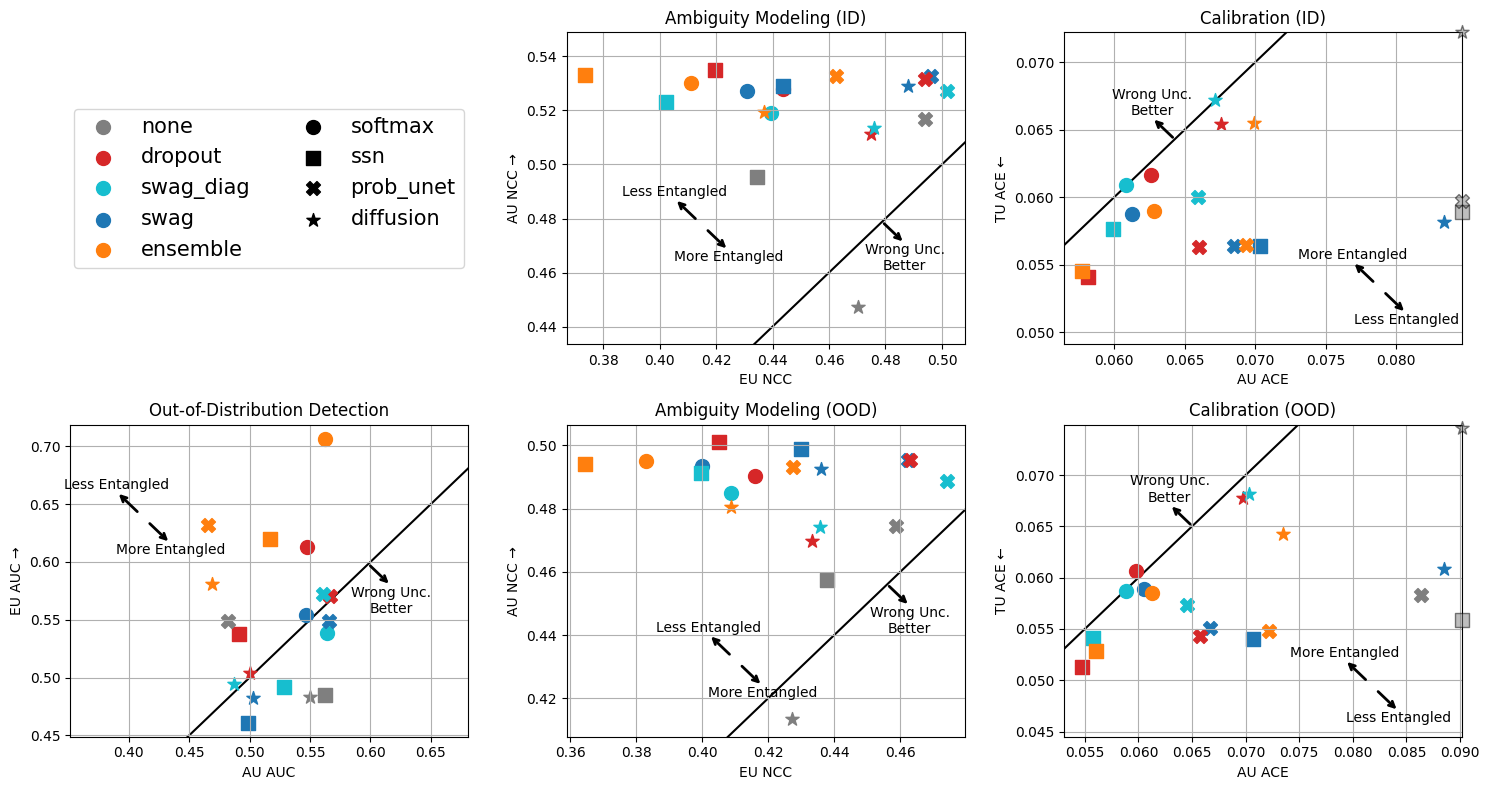

In [ ]:
from helpers import plot_scatter_grid, model_scatter
plot_scatter_grid(table)#,save_path="/home/jloch/Desktop/diff/writing/ECCV2026/ECCV_2026_AU_EU/images/scatter_grid.pdf");

{'fig': <Figure size 500x500 with 1 Axes>,
 'ax': <Axes: title={'center': 'Scatter of id_ged vs id_dice'}, xlabel='id_dice', ylabel='id_ged'>,
 'legend': <matplotlib.legend.Legend at 0x7698243185e0>}

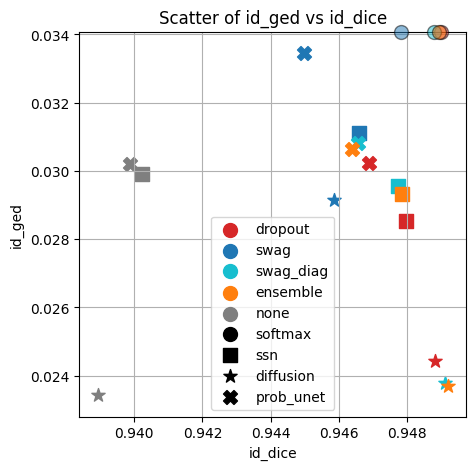

In [70]:
model_scatter(table,x="id_dice",y="id_ged",entangle_is_up=None, ignore_for_axis={"AU": ["softmax"]})

# aggr study chaksu

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


matrices = {}
ood_types = ["ood"]
aggr_types = ['patch_level', 'image_level', 'threshold', 'area_normalized', 'border_normalized']

from helpers import load_result_table,plot_metric_matrix, plot_mm_grid
for aggr in aggr_types:
    table = load_result_table(swap_AU_EU=False,
                            formatter="{AU}_{EU}_1",epoch=500,
                            loop_params = {
                                "AU": ["softmax", "ssn", "diffusion", "prob_unet"],
                                "EU": ["swag", "dropout", "swag_diag"]
                    },
                    save_path = "/home/jloch/Desktop/diff/luzern/values/saves/chaksu128/test_results/",
                    aggregation_type = aggr)
    out = plot_metric_matrix(table, metric="AU_auc",reldiff="(EU-AU)_auc",subkey="ood",cbar_keys=["EU_auc"])
    #dont show the figure:
    plt.close()
    matrices[aggr] = out["matrix"]

In [14]:


#make a matrix of lists over aggregation types for each subkey. Each matrix is a 4x3 matrix as a pandas table
#initalize with empty lists
all_matrix = matrices[aggr_types[0]].copy()
#fill the pandas table with empty lists
all_matrix = all_matrix.applymap(lambda x: [])
#fill the matrices with the values from each aggregation type
for aggr in aggr_types:
        for i in range(all_matrix.shape[0]):
            for j in range(all_matrix.shape[1]):
                all_matrix.iloc[i,j].append(matrices[aggr].iloc[i,j])
def gaussnorm(x):
    x = np.array(x)
    return (x - x.mean()) / x.std()
# normalize with gaussian for all lists
all_matrix = all_matrix.applymap(lambda x: gaussnorm(x))


/tmp/ipykernel_201365/378545066.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x="aggr",y="value",ax=ax, palette="Set2")


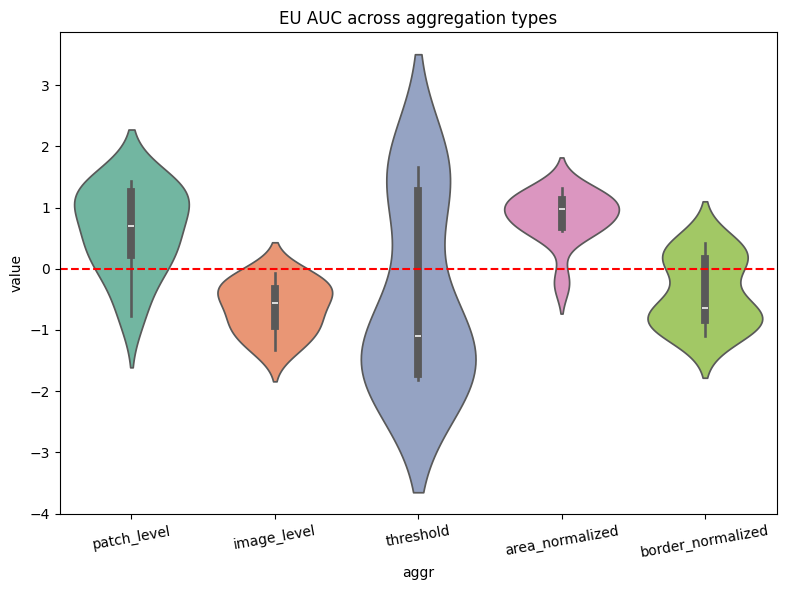

In [15]:


fig,ax = plt.subplots(1, 1, figsize=(8,6))
import seaborn as sns
import pandas as pd
#make a violin plot where each violin is a aggr type. The dataset for the violin is the flattened matrix for each aggr type. The x axis is the aggr type and the y axis is the value of the matrix element. The title is "EU AUC across aggregation types"
#first make a dataframe where each row is a value from the matrix and has a column for the aggr type
df = pd.DataFrame(columns=["aggr","value"])
for aggr_idx,aggr in enumerate(aggr_types):
    values = [item[aggr_idx] for item in all_matrix.values.flatten()]
    df = pd.concat([df,pd.DataFrame({"aggr":[aggr]*len(values),"value":values})], ignore_index=True)
sns.violinplot(data=df,x="aggr",y="value",ax=ax, palette="Set2")
ax.set_title("EU AUC across aggregation types")
#make 0-line
ax.axhline(0, color="red", linestyle="--")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# aggr study

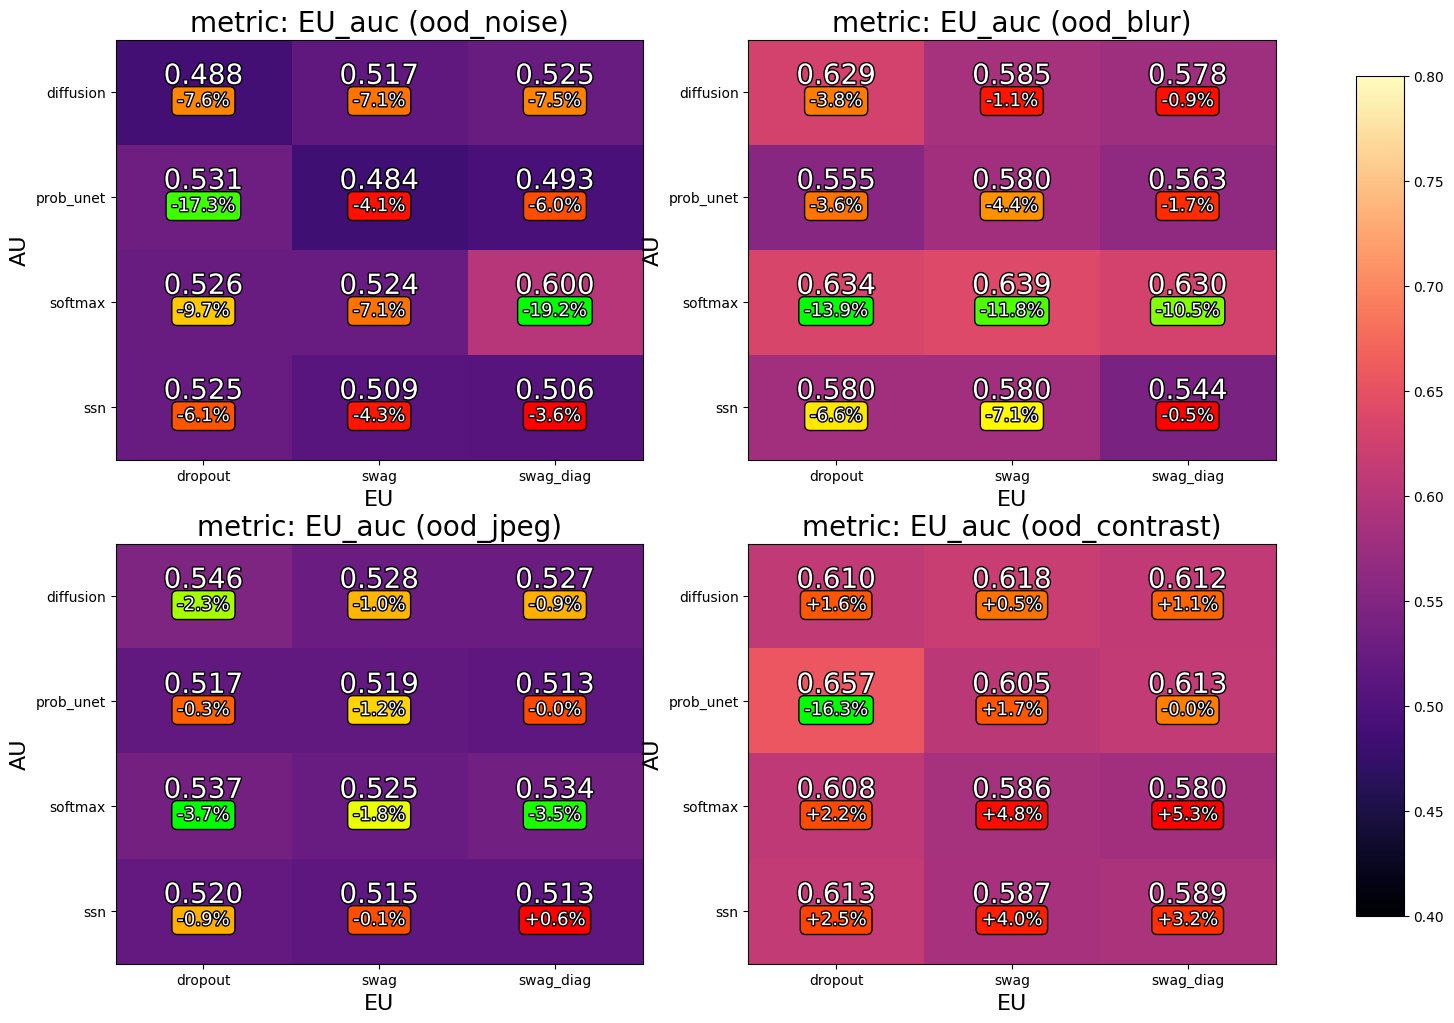

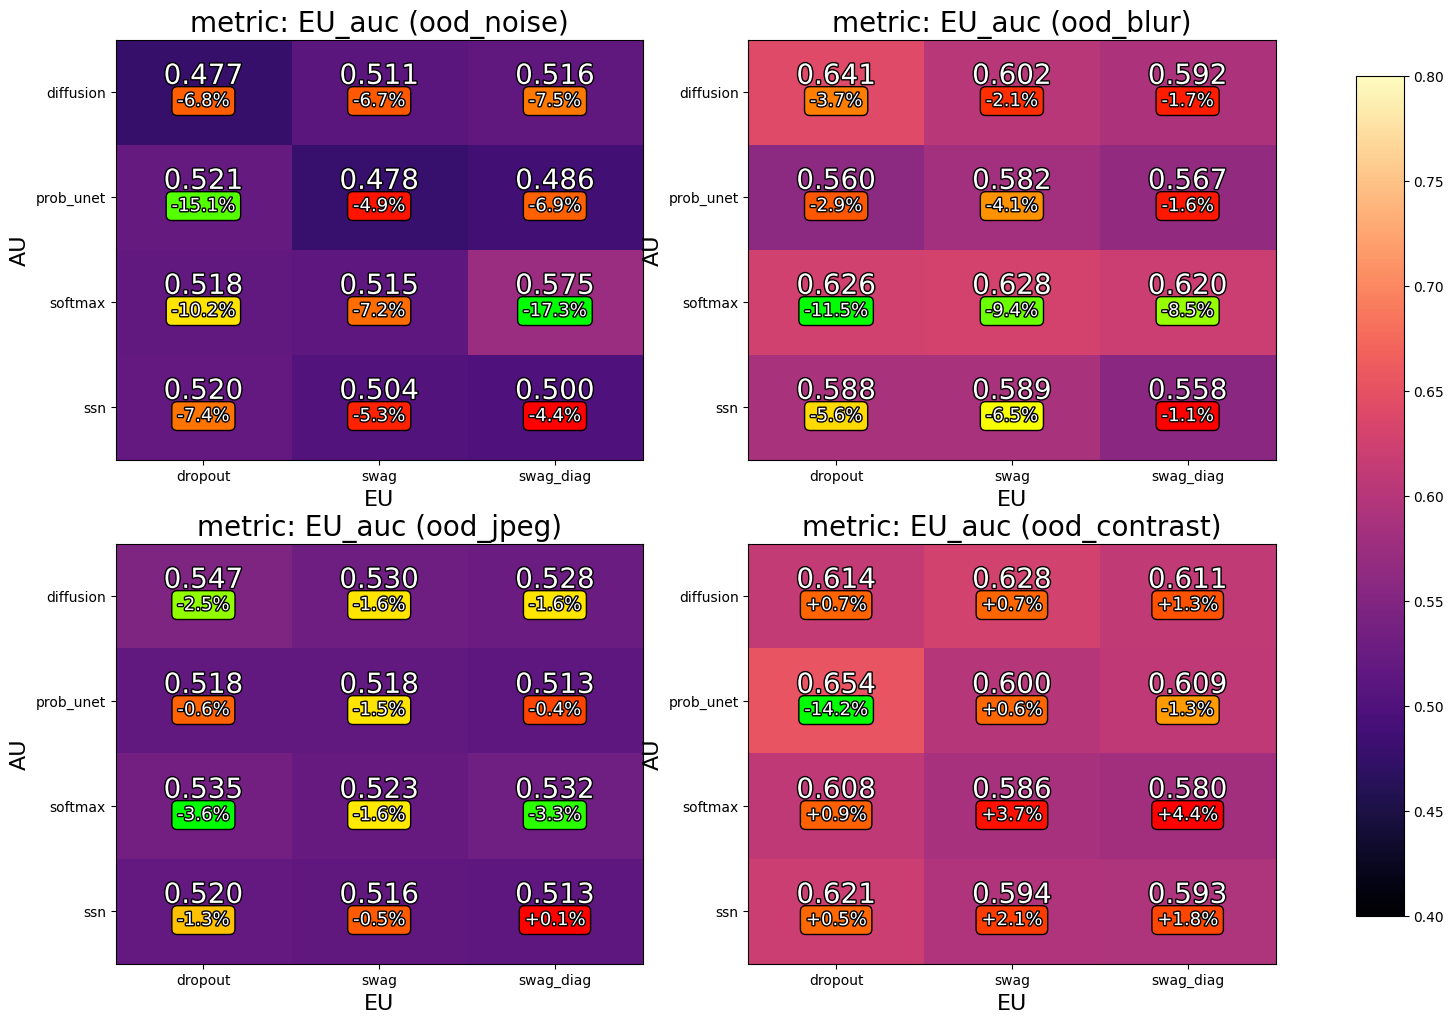

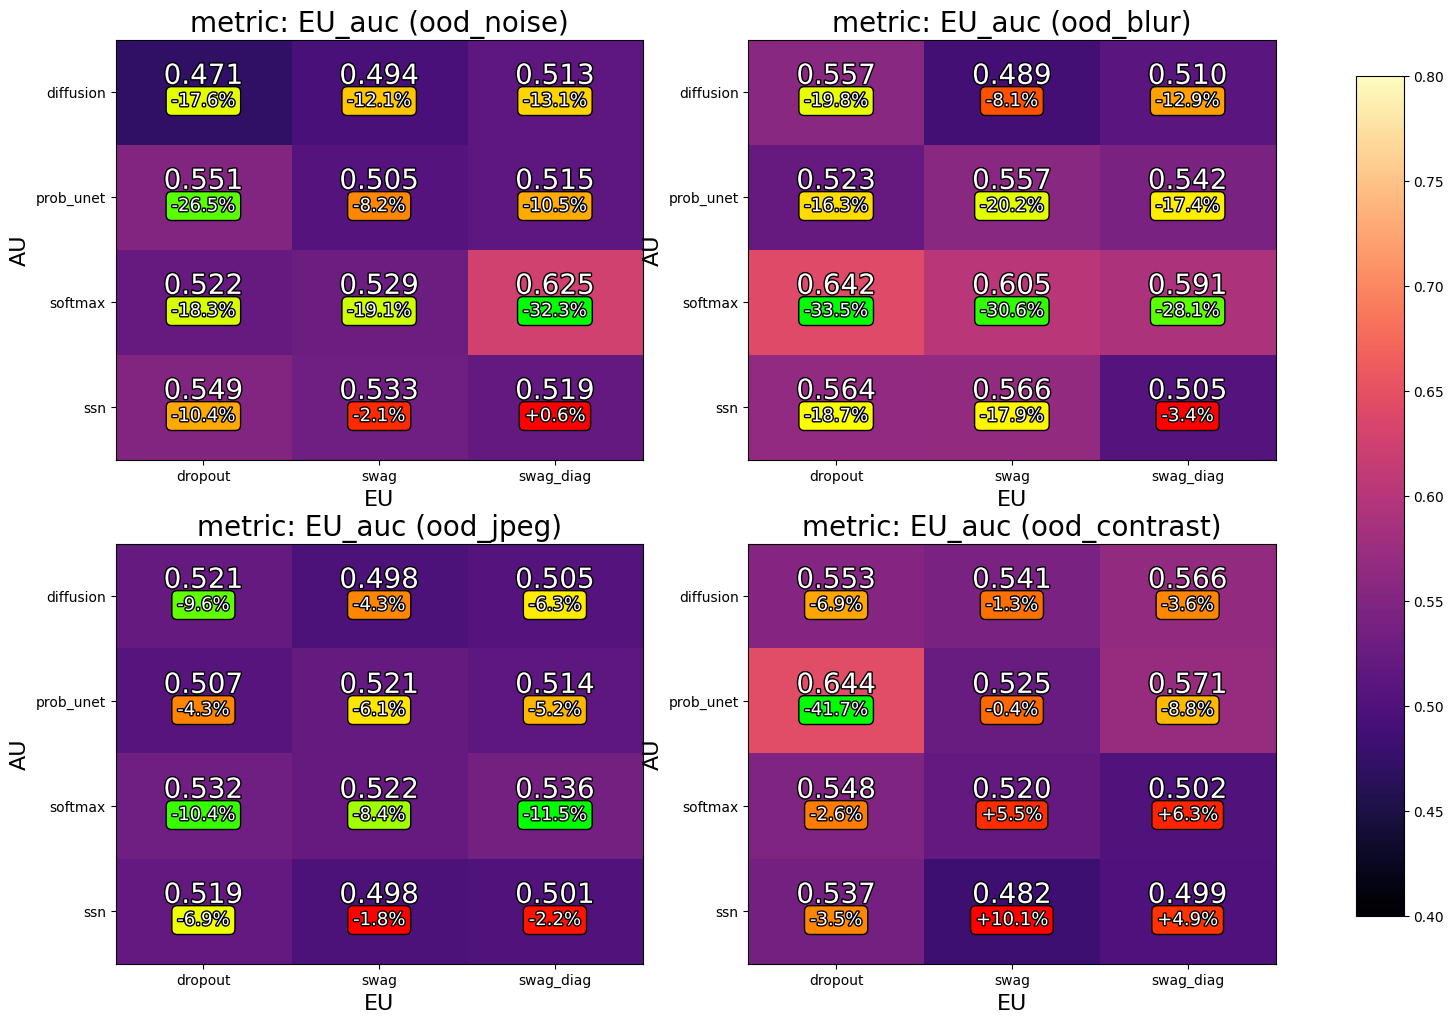

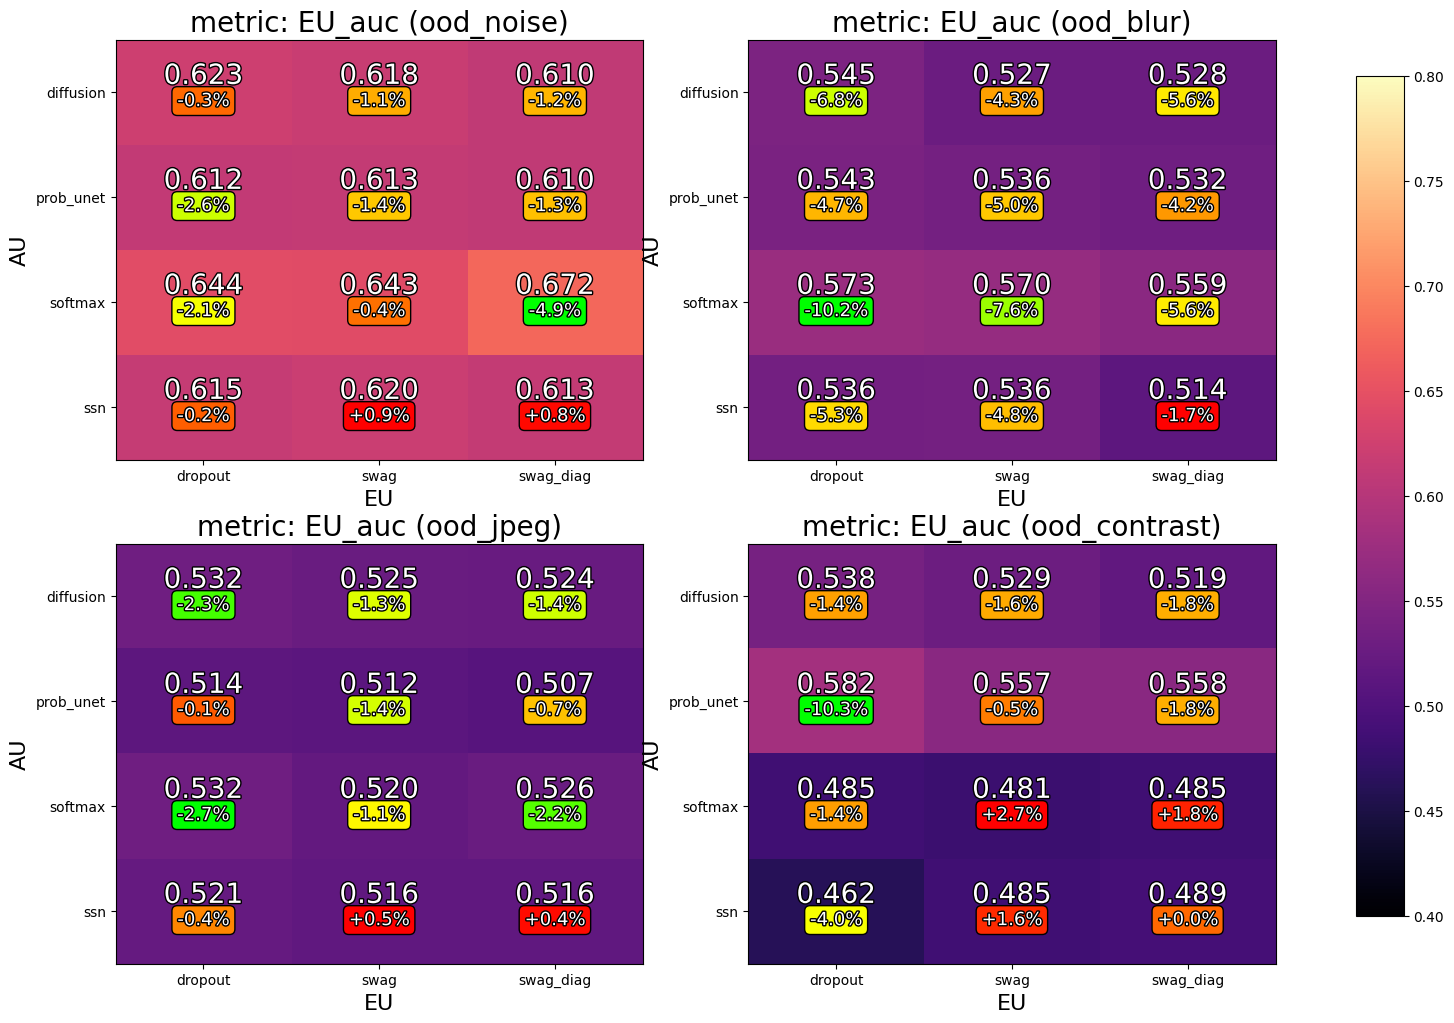

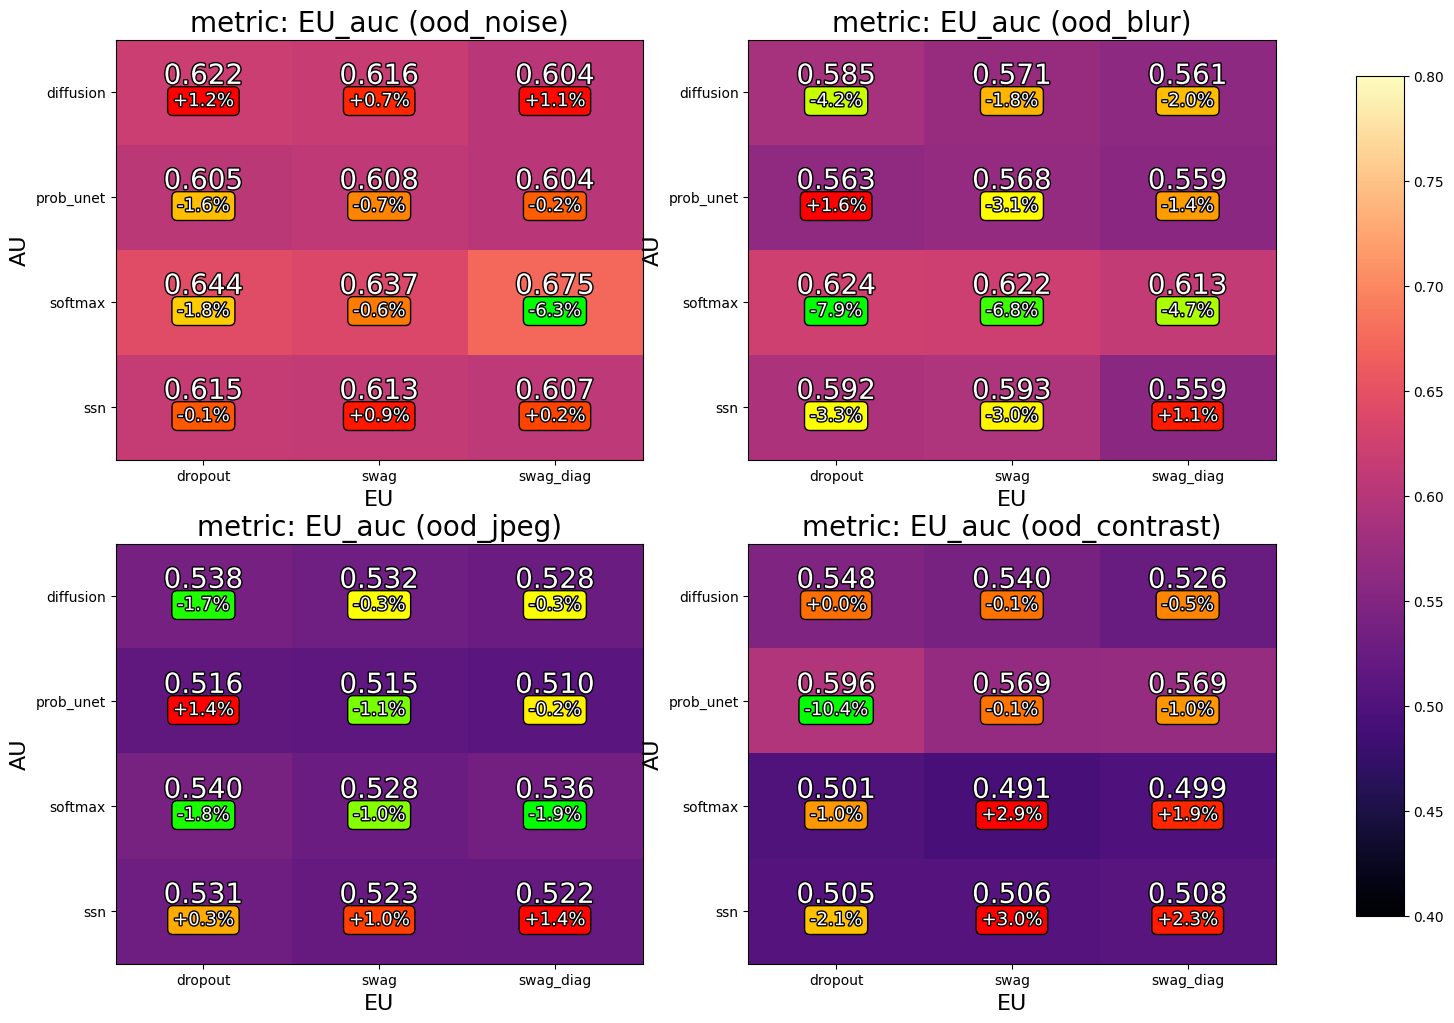

In [29]:
matrices = {}
import pandas as pd
ood_types = ["ood_noise", "ood_blur", "ood_jpeg", "ood_contrast"]
aggr_types = ['patch_level', 'image_level', 'threshold', 'area_normalized', 'border_normalized']

from helpers import load_result_table,plot_metric_matrix, plot_mm_grid
for aggr in aggr_types:
    table = load_result_table(swap_AU_EU=False,
                            formatter="{AU}_{EU}",epoch=1000,
                            loop_params = {
                                "AU": ["softmax", "ssn", "diffusion", "prob_unet"],
                                "EU": ["swag", "dropout", "swag_diag"]
                    },
                    save_path = "/home/jloch/Desktop/diff/luzern/values/saves/lidc64/test_results/",
                    aggregation_type = aggr)
    out = plot_mm_grid(table,
    kwarg_grid=[[{"metric": "EU_auc","reldiff": "(EU-AU)_auc","subkey": "ood_noise","cbar_keys": ["EU_auc"]},
                {"metric": "EU_auc","reldiff": "(EU-AU)_auc","subkey": "ood_blur","cbar_keys": ["EU_auc"]}],
                [{"metric": "EU_auc","reldiff": "(EU-AU)_auc","subkey": "ood_jpeg","cbar_keys": ["EU_auc"]},
                {"metric": "EU_auc","reldiff": "(EU-AU)_auc","subkey": "ood_contrast","cbar_keys": ["EU_auc"]}]],
                same_cbar_vals=(0.4,0.8))
    matrices[aggr] = {"ood_noise": out[0][0]["matrix"], "ood_blur": out[0][1]["matrix"], 
                      "ood_jpeg": out[1][0]["matrix"],  "ood_contrast": out[1][1]["matrix"]}



In [30]:
import numpy as np
#make a matrix of lists over aggregation types for each subkey. Each matrix is a 4x3 matrix as a pandas table
all_matrix = {}
#initalize with empty lists
for subkey in ood_types:
    all_matrix[subkey] = matrices[aggr_types[0]][subkey].copy()
    #fill the pandas table with empty lists
    all_matrix[subkey] = all_matrix[subkey].applymap(lambda x: [])
#fill the matrices with the values from each aggregation type
for aggr in aggr_types:
    for subkey in ood_types:
        for i in range(all_matrix[subkey].shape[0]):
            for j in range(all_matrix[subkey].shape[1]):
                all_matrix[subkey].iloc[i,j].append(matrices[aggr][subkey].iloc[i,j])
def gaussnorm(x):
    x = np.array(x)
    return (x - x.mean()) / x.std()
# normalize with gaussian for all lists
for subkey in ood_types:
    all_matrix[subkey] = all_matrix[subkey].applymap(lambda x: gaussnorm(x))


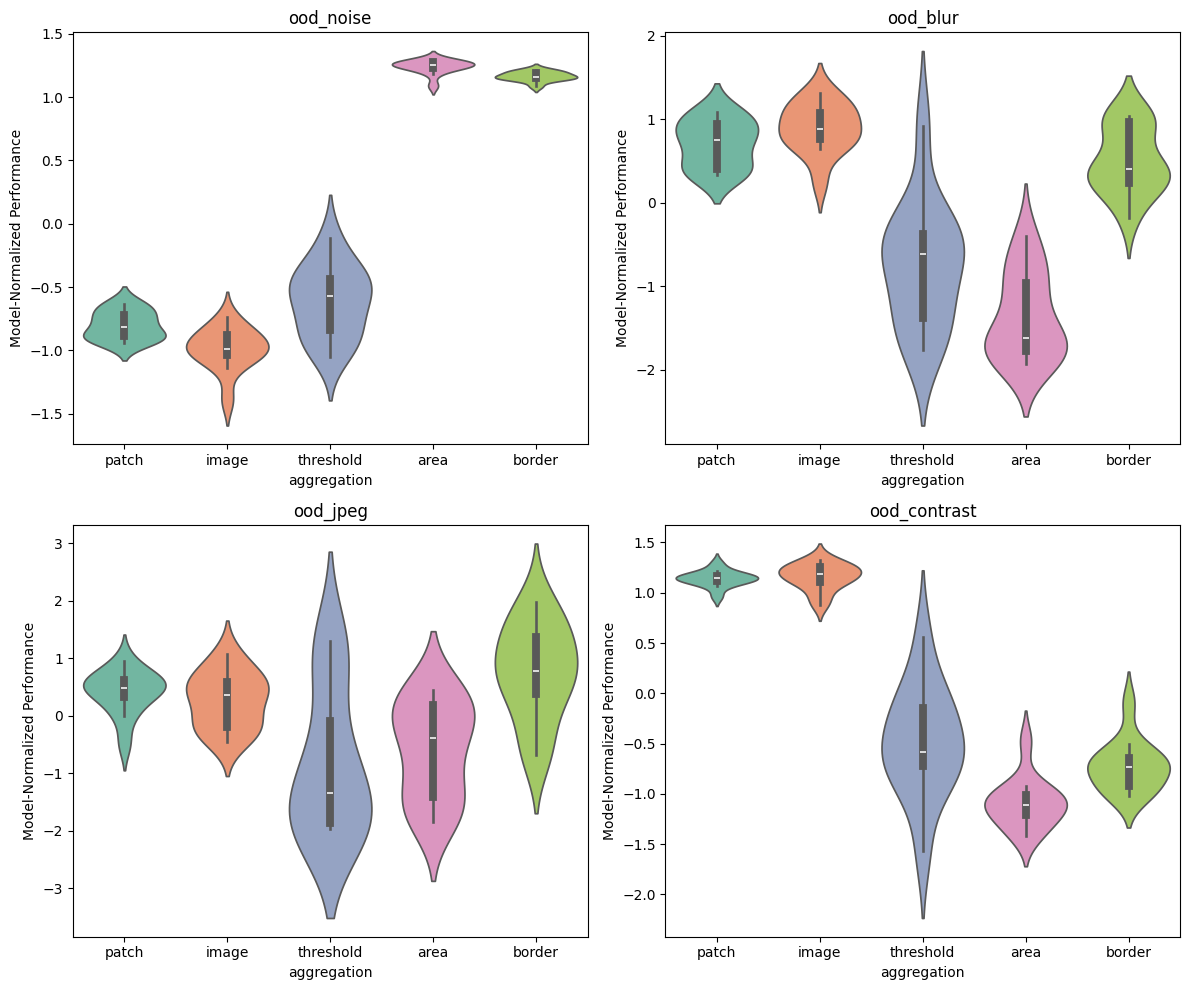

In [31]:

fig,axs = plt.subplots(2,2, figsize=(12,10))
import seaborn as sns
import pandas as pd
#make a dataframe with columns "value" and "aggr"
for i, ood_type in enumerate(ood_types):
    ax = axs[i//2, i%2]
    df = pd.DataFrame(columns=["Model-Normalized Performance", "aggregation"])
    for i, aggr in enumerate(aggr_types):
        values = []
        for j in range(all_matrix[ood_type].shape[0]):
            for k in range(all_matrix[ood_type].shape[1]):
                values.append(all_matrix[ood_type].iloc[j,k][i])
        df = pd.concat([df, pd.DataFrame({"Model-Normalized Performance": values, "aggregation": aggr})], ignore_index=True)
    # change all aggr names with lambda x: x.split("_")[0]
    df["aggregation"] = df["aggregation"].apply(lambda x: x.split("_")[0])
    sns.violinplot(x="aggregation", y="Model-Normalized Performance", data=df, palette="Set2", ax=ax, hue="aggregation", dodge=False)
    ax.set_title(ood_type)
plt.tight_layout()

/tmp/ipykernel_416195/59095297.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="aggregation", y="mean_performance", data=df, palette="Set2", ax=axs)


Text(0.5, 1.0, 'Mean Model-Normalized Performance across OOD Types')

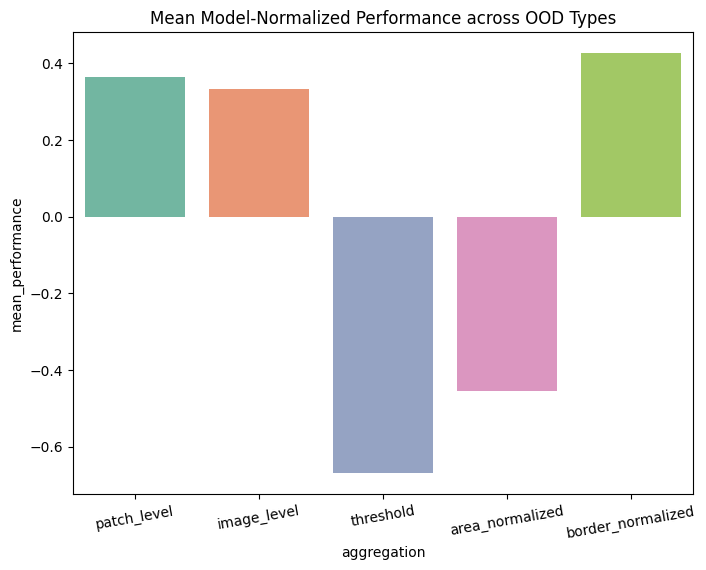

In [206]:
#make a barplot with same set2 colors where we aggregate all the mean performances to get a single number per aggr type

fig,axs = plt.subplots(1,1, figsize=(8,6))
import seaborn as sns
import pandas as pd
#make a dataframe with columns "value" and "aggr"
vals = {aggr: [] for aggr in aggr_types}
for i, ood_type in enumerate(ood_types):
    for i, aggr in enumerate(aggr_types):
        values = []
        for j in range(all_matrix[ood_type].shape[0]):
            for k in range(all_matrix[ood_type].shape[1]):
                values.append(all_matrix[ood_type].iloc[j,k][i])
        vals[aggr].append(np.mean(values))
df = pd.DataFrame({"aggregation": list(vals.keys()), "mean_performance": [np.mean(vals[aggr]) for aggr in vals.keys()]})
sns.barplot(x="aggregation", y="mean_performance", data=df, palette="Set2", ax=axs)
plt.xticks(rotation=10)
plt.title("Mean Model-Normalized Performance across OOD Types")

Text(0.5, 1.0, 'Borders')

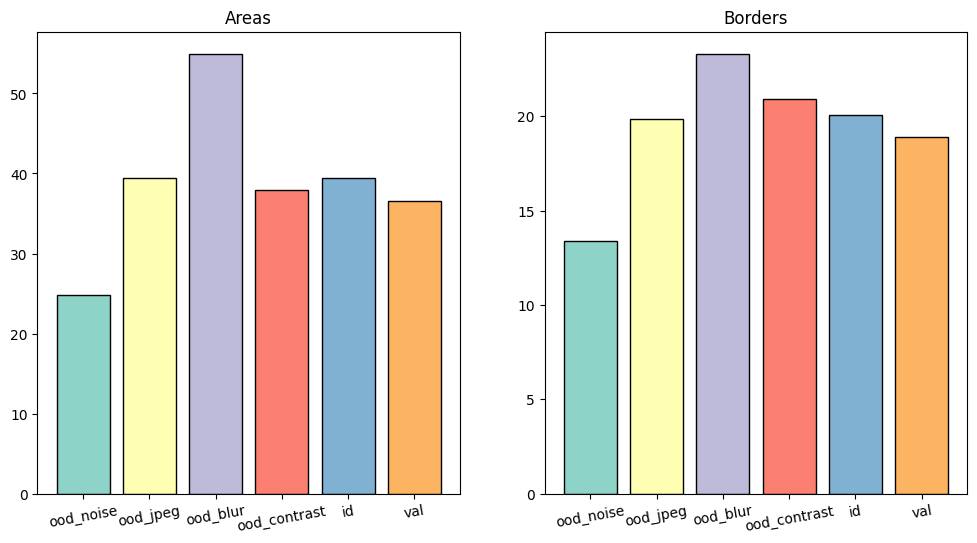

In [239]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
p = "/home/jloch/Desktop/diff/luzern/values/saves/lidc64/test_results/diffusion_swag/e1000_ema"
areas = {}
borders = {}
for file in Path(p).glob("*/area.json"):
    split = file.parts[-2]
    with open(file, "r") as f:        
        area = json.load(f)
    areas[split] = [v["area"] for v in area.values()]
    borders[split] = [v["border"] for v in area.values()]
#sort keys
areas = dict(sorted(areas.items()))
borders = dict(sorted(borders.items()))
import pandas as pd
#make a log scale dataframe with columns "value" and "split"
df_area = pd.DataFrame(columns=["value", "split"])
df_border = pd.DataFrame(columns=["value", "split"])
f = lambda x: x
for split in areas.keys():
    df_area = pd.concat([df_area, pd.DataFrame({"value": f(areas[split]), "split": split})], ignore_index=True)
    df_border = pd.concat([df_border, pd.DataFrame({"value": f(borders[split]), "split": split})], ignore_index=True)

split_names = ["ood_noise", "ood_jpeg", "ood_blur", "ood_contrast","id","val"]
mean_areas = [np.mean(areas[split]) for split in split_names]
mean_borders = [np.mean(borders[split]) for split in split_names]
#plot barplot of mean areas and borders with matplotlib
#Use set3 as colors
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(split_names, mean_areas, color=plt.cm.Set3.colors, edgecolor="black")
plt.xticks(rotation=10)
plt.title("Areas")
plt.subplot(1,2,2)
plt.bar(split_names, mean_borders, color=plt.cm.Set3.colors, edgecolor="black")
plt.xticks(rotation=10)
plt.title("Borders")

# lidc

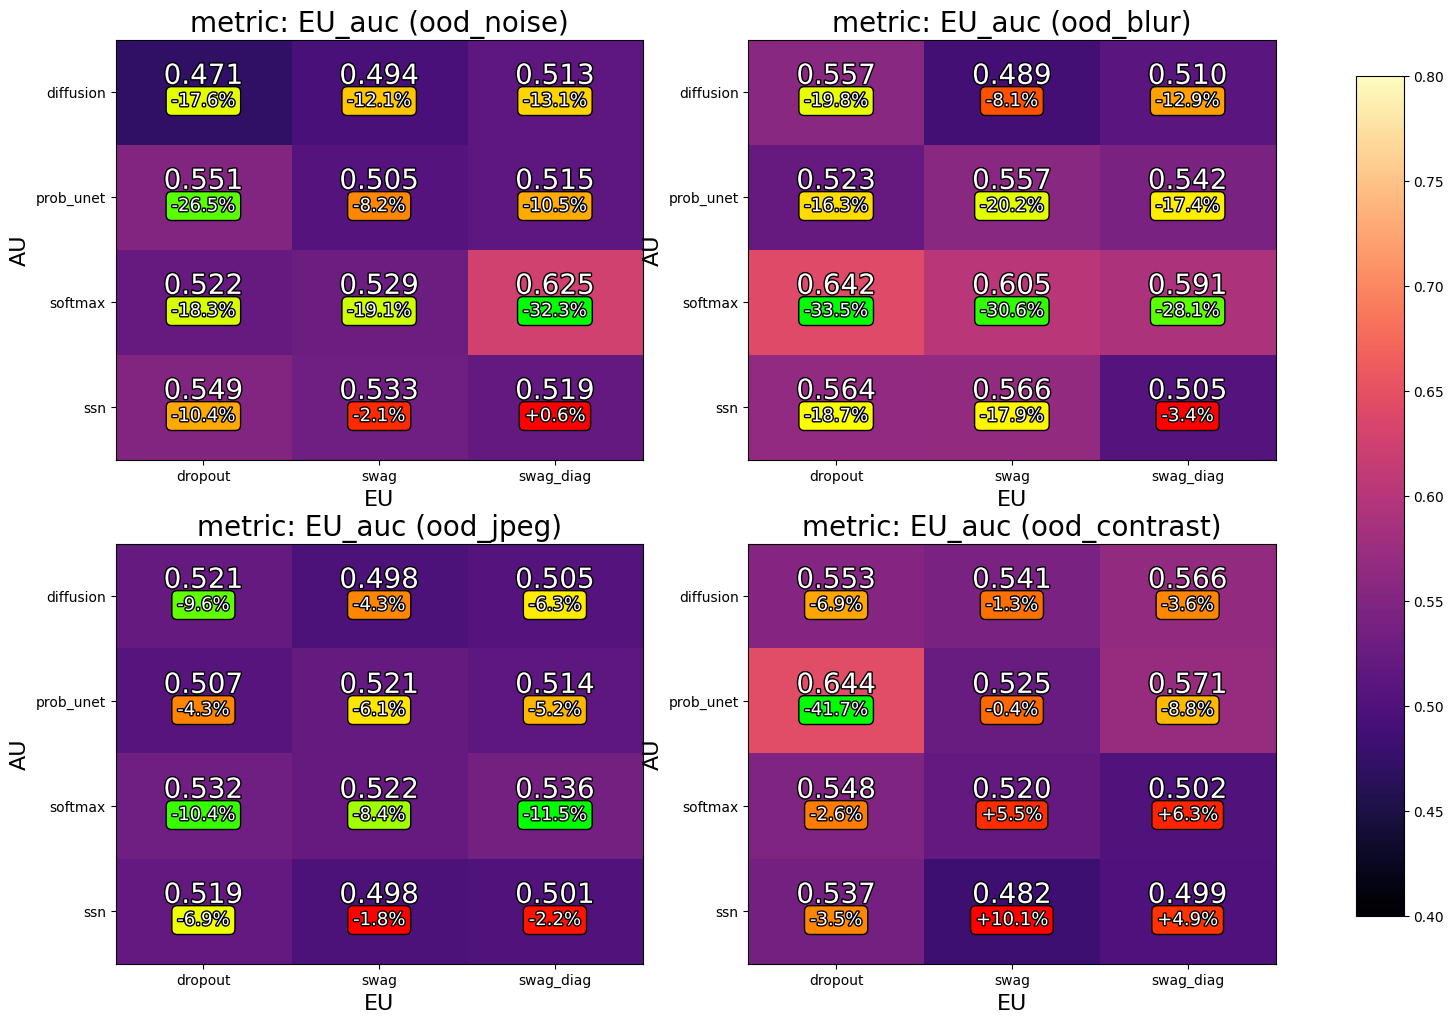

In [ ]:
from helpers import plot_mm_grid
plot_mm_grid(table,
    kwarg_grid=[[{"metric": "EU_auc","reldiff": "(EU-AU)_auc","subkey": "ood_noise","cbar_keys": ["EU_auc"]},
                {"metric": "EU_auc","reldiff": "(EU-AU)_auc","subkey": "ood_blur","cbar_keys": ["EU_auc"]}],
                [{"metric": "EU_auc","reldiff": "(EU-AU)_auc","subkey": "ood_jpeg","cbar_keys": ["EU_auc"]},
                {"metric": "EU_auc","reldiff": "(EU-AU)_auc","subkey": "ood_contrast","cbar_keys": ["EU_auc"]}]],
                same_cbar_vals=(0.4,0.8))

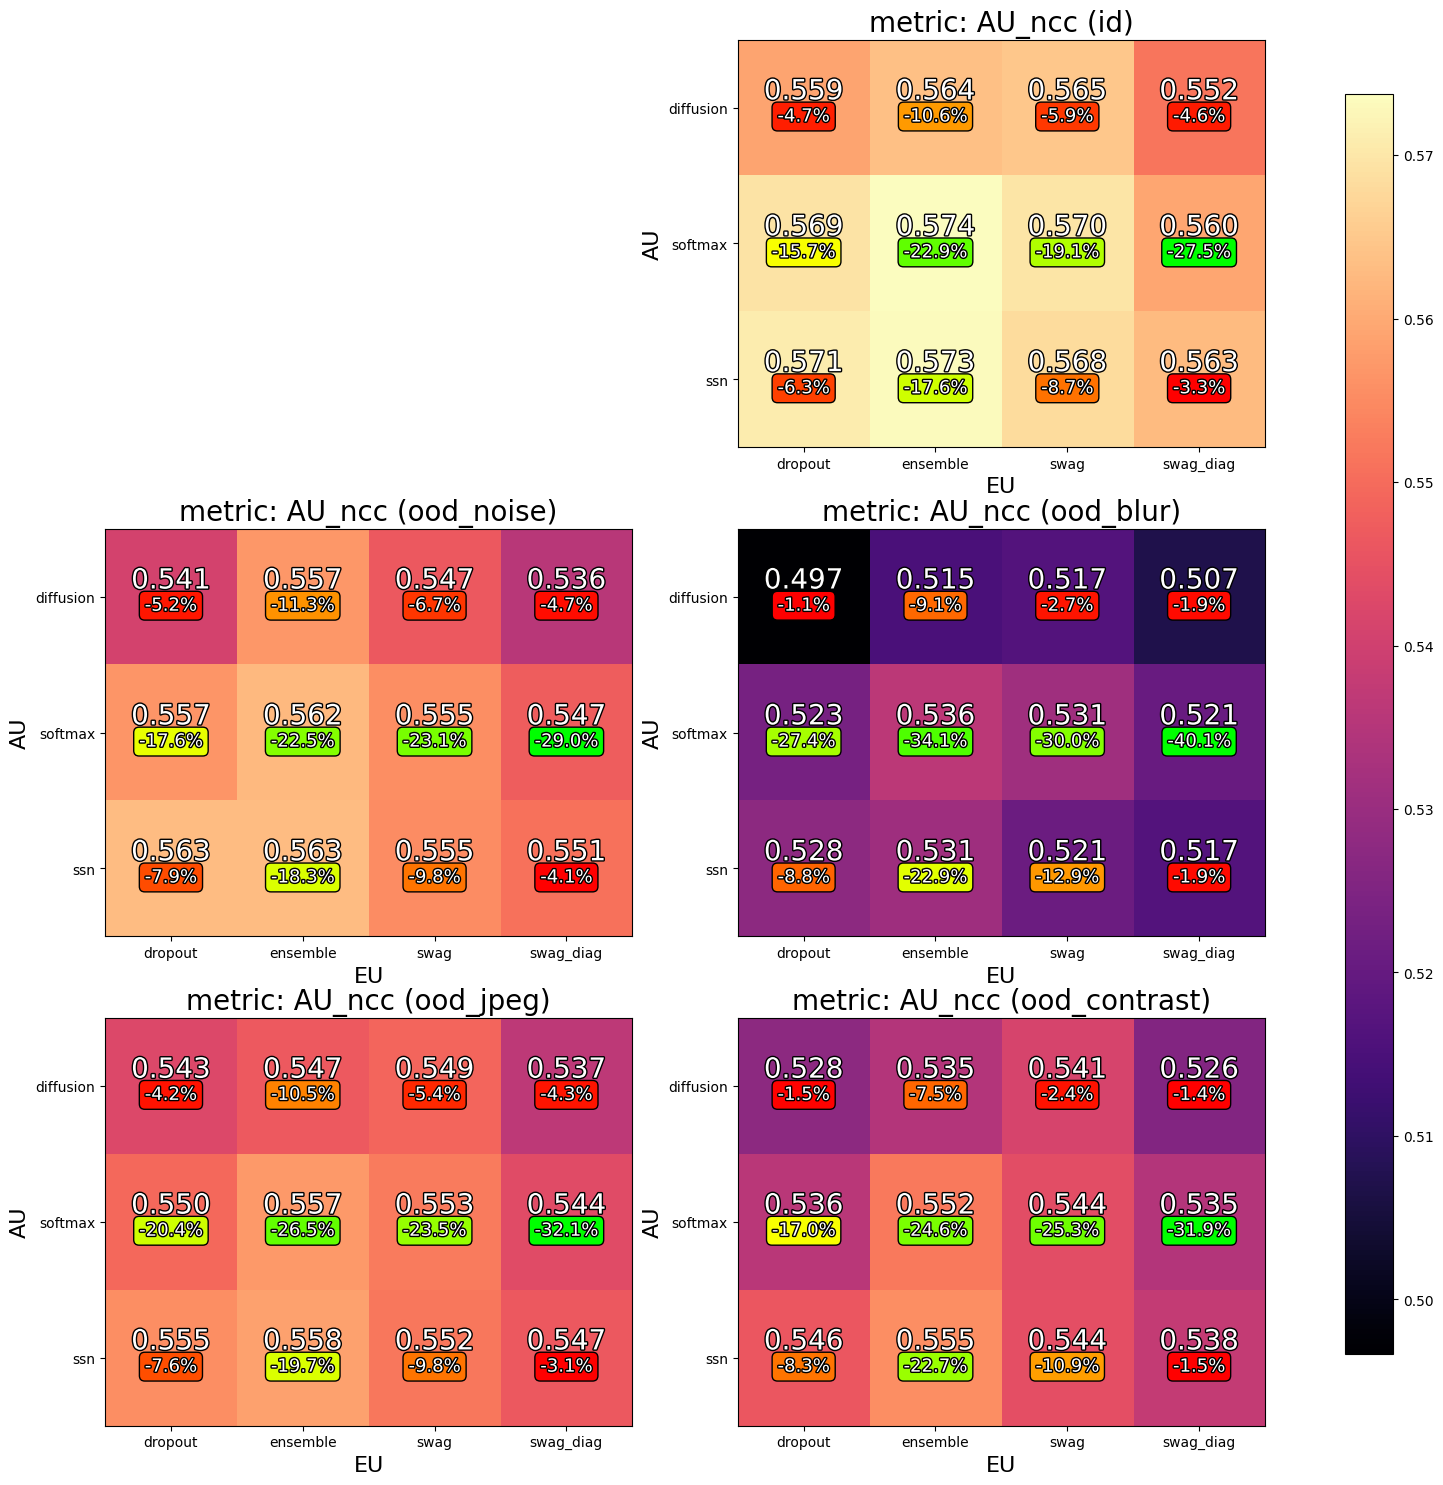

In [51]:
plot_mm_grid(table,
    kwarg_grid=[[None,
                {"metric": "AU_ncc","reldiff": "(AU-EU)_ncc","subkey": "id","cbar_keys": ["AU_ncc"]}],
                [{"metric": "AU_ncc","reldiff": "(AU-EU)_ncc","subkey": "ood_noise","cbar_keys": ["AU_ncc"]},
                {"metric": "AU_ncc","reldiff": "(AU-EU)_ncc","subkey": "ood_blur","cbar_keys": ["AU_ncc"]}],
                [{"metric": "AU_ncc","reldiff": "(AU-EU)_ncc","subkey": "ood_jpeg","cbar_keys": ["AU_ncc"]},
                {"metric": "AU_ncc","reldiff": "(AU-EU)_ncc","subkey": "ood_contrast","cbar_keys": ["AU_ncc"]}]])

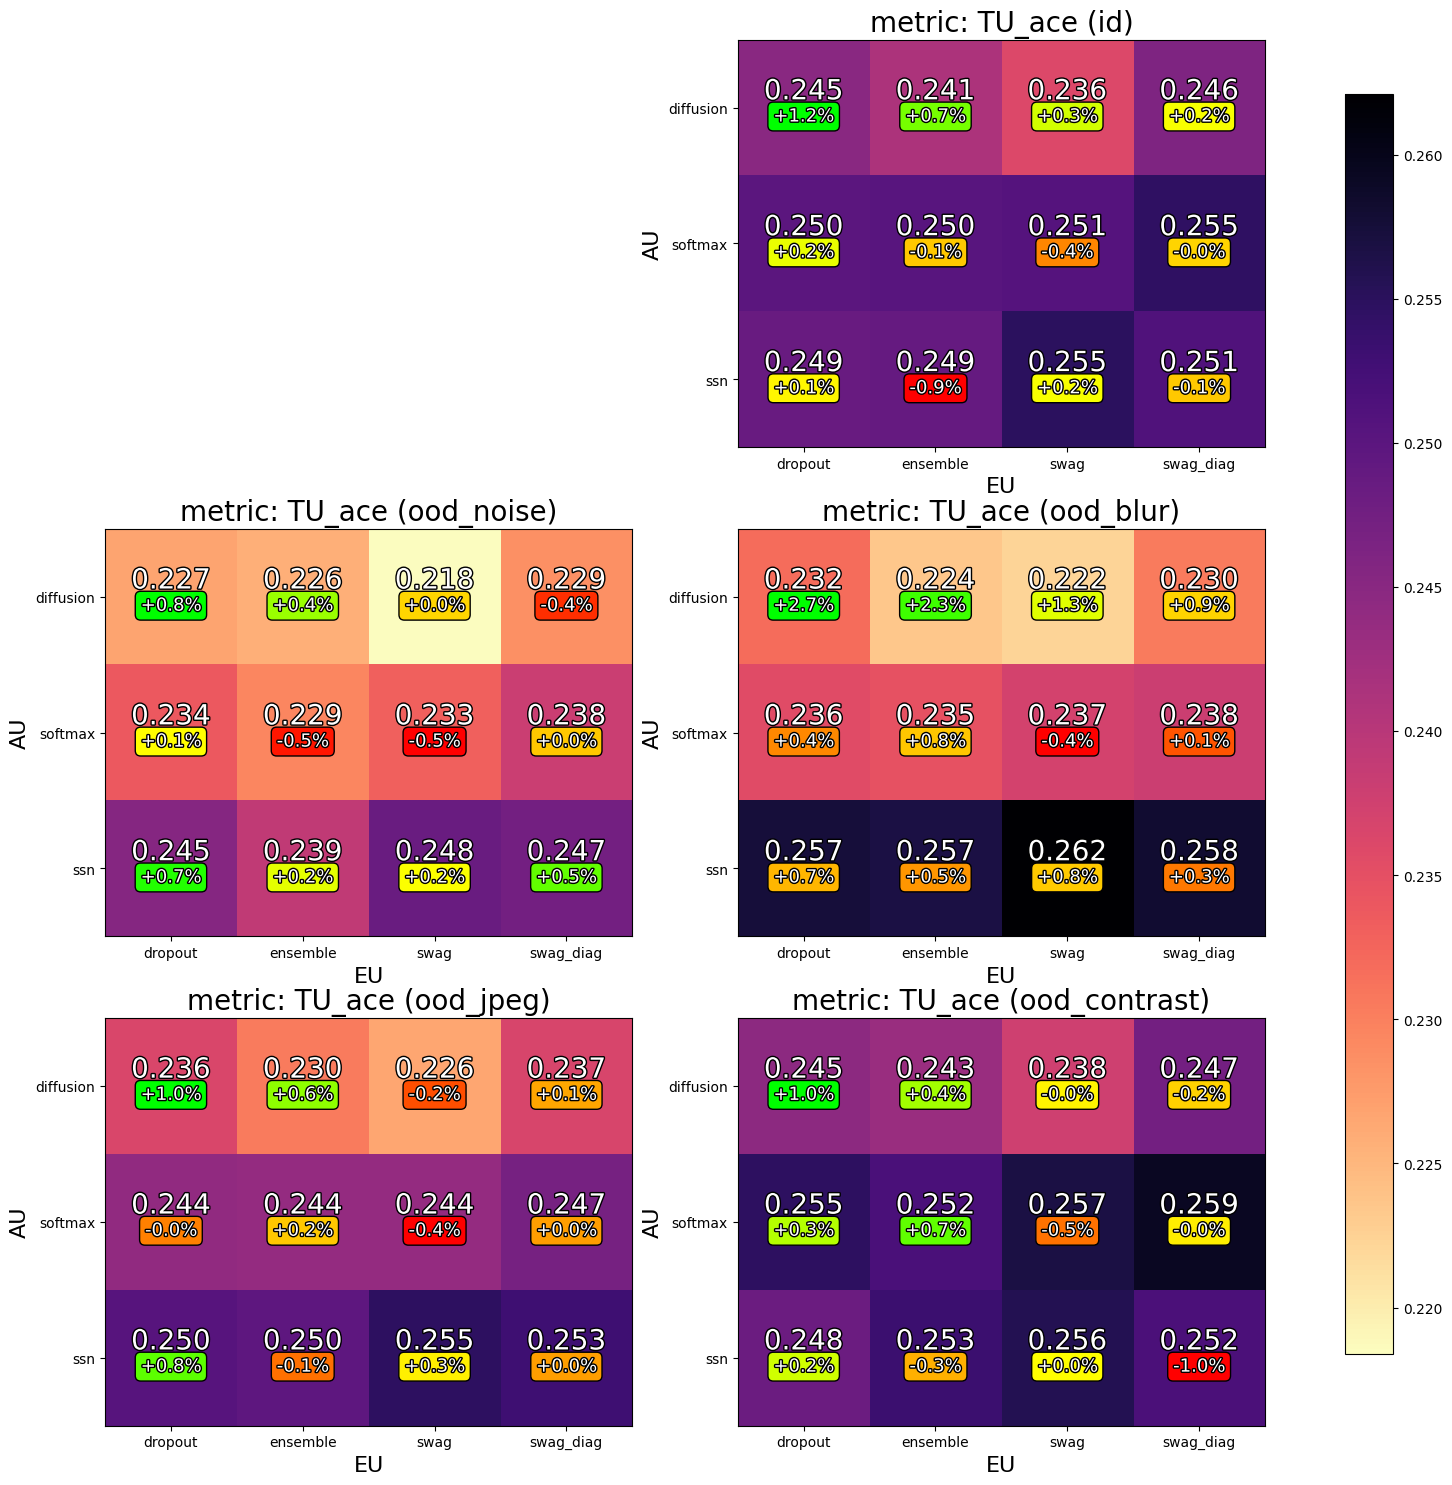

In [ ]:
plot_mm_grid(table,
    kwarg_grid=[[None,
                {"metric": "TU_ace","reldiff": "(min(AU,EU)-TU)_ace","subkey": "id","cbar_keys": ["TU_ace"]}],
                [{"metric": "TU_ace","reldiff": "(min(AU,EU)-TU)_ace","subkey": "ood_noise","cbar_keys": ["TU_ace"]},
                {"metric": "TU_ace","reldiff": "(min(AU,EU)-TU)_ace","subkey": "ood_blur","cbar_keys": ["TU_ace"]}],
                [{"metric": "TU_ace","reldiff": "(min(AU,EU)-TU)_ace","subkey": "ood_jpeg","cbar_keys": ["TU_ace"]},
                {"metric": "TU_ace","reldiff": "(min(AU,EU)-TU)_ace","subkey": "ood_contrast","cbar_keys": ["TU_ace"]}]])

# grid unc plot

In [17]:

from helpers import plot_pred_grid, pred_grid_computation
p = "/home/jloch/Desktop/diff/luzern/values/saves/chaksu128/ssn_dropout_1/checkpoints/last.ckpt"
p = ["/home/jloch/Desktop/diff/luzern/values/saves/chaksu128/ssn_ens_10/checkpoints/last.ckpt",
     "/home/jloch/Desktop/diff/luzern/values/saves/chaksu128/ssn_ens_11/checkpoints/last.ckpt",
     "/home/jloch/Desktop/diff/luzern/values/saves/chaksu128/ssn_ens_12/checkpoints/last.ckpt",
     "/home/jloch/Desktop/diff/luzern/values/saves/chaksu128/ssn_ens_13/checkpoints/last.ckpt",
     "/home/jloch/Desktop/diff/luzern/values/saves/chaksu128/ssn_ens_14/checkpoints/last.ckpt"]
images, batch0 = pred_grid_computation(ckpt_path = p,
                          split = "id_test",
                          test_batch_size = 1)
plot_pred_grid(images, batch0, 0)

AttributeError: 'list' object has no attribute 'seek'. You can only torch.load from a file that is seekable. Please pre-load the data into a buffer like io.BytesIO and try to load from it instead.

Seed set to 120


SETTING GLOBAL SEED TO 120
Dataset: chaksu64 id_test - 264 images
saving to results dir /home/jloch/Desktop/diff/luzern/values/saves/chaksu64/test_results/prob_unet_dropout/e640/id


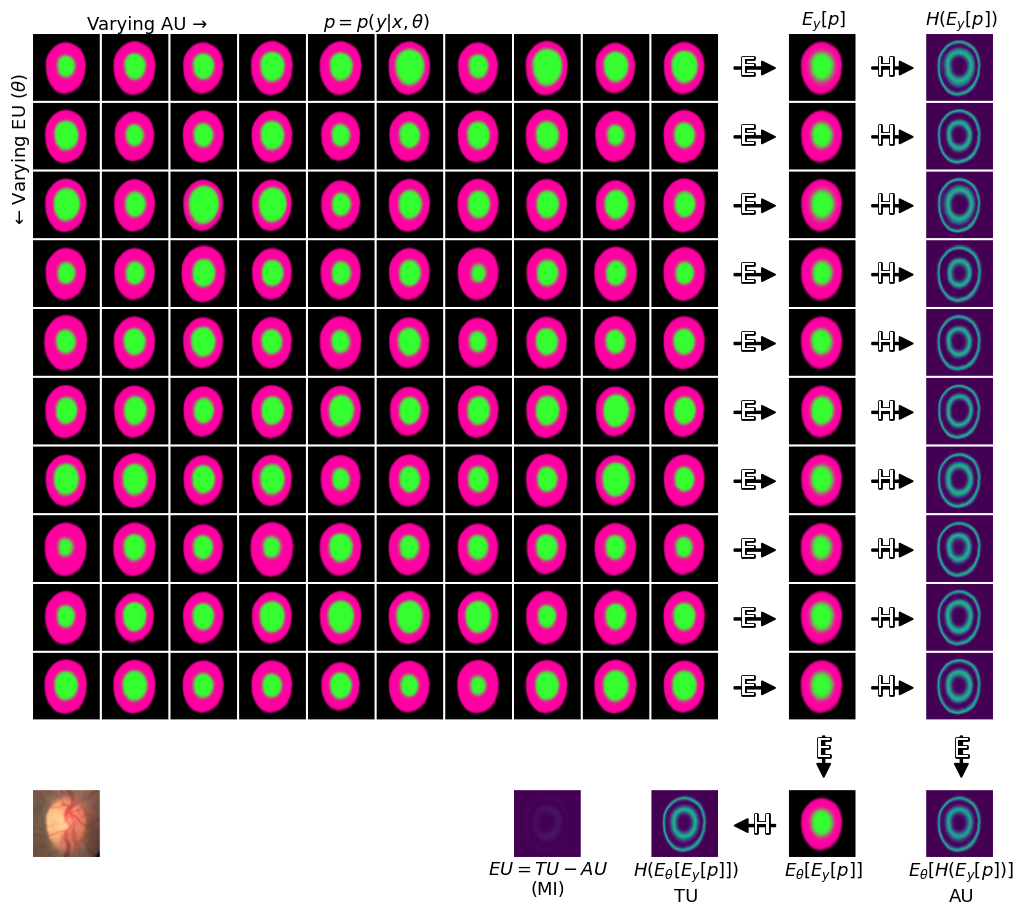

In [310]:

from helpers import plot_pred_grid, pred_grid_computation
p = "/home/jloch/Desktop/diff/luzern/values/saves/chaksu64/prob_unet_dropout/checkpoints/last.ckpt"
images, batch0 = pred_grid_computation(ckpt_path = p,
                          split = "id_test",
                          test_batch_size = 1)
plot_pred_grid(images, batch0, 0)

In [302]:
batch0["softmax_pred"].shape

torch.Size([10, 1, 3, 64, 64])

In [131]:
plot_pred_grid(images, batch0, 11, s=1, crop_unused=False, entropy_cmap="viridis")

torch.Size([1, 64, 64, 3])
torch.Size([1, 64, 64, 3])


ValueError: Expected a single-channel 2D tensor for grayscale conversion.

# dataset vis

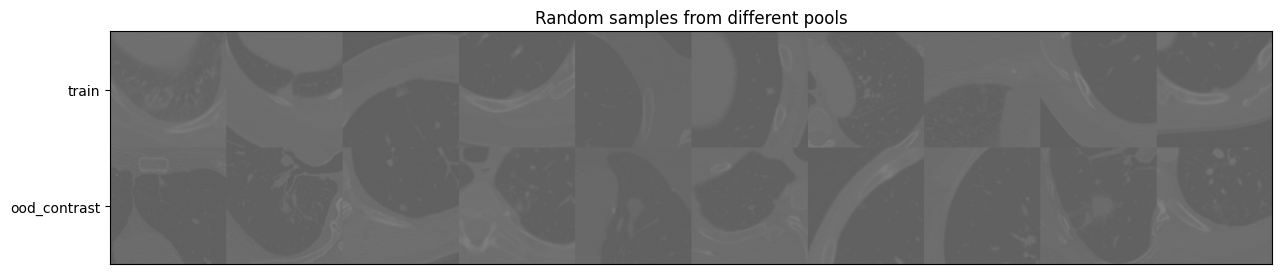

In [23]:
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
p = "/home/jloch/Desktop/diff/luzern/values_datasets/origlidc128/splits/ood_aug/firstCycle/splits.pkl"
with open(p, "rb") as f:
    splits = pickle.load(f)
p = "/home/jloch/Desktop/diff/luzern/values_datasets/origlidc128/preprocessed/images"
pools_show = ["train","ood_contrast"]
n_images_per_pool = 10
m = len(pools_show)
#plot a m x n grid of images
concat_image = []
for pool in pools_show:
    pool_images = []
    pool_labels = []
    for i in range(n_images_per_pool):
        img_path = np.random.choice(splits[0][pool])
        img = np.load(Path(p)/img_path)
        pool_images.append(img)
        pool_labels.append([])
        for j in range(4):
            label_path = img_path.replace(".npy", f"_{j:02d}_mask.npy")
            label = np.load(Path(p.replace("/images", "/labels"))/label_path)
            pool_labels[-1].append(label)
    concat_image.append(np.concatenate(pool_images, axis=1))
final_image = np.concatenate(concat_image, axis=0)
plt.figure(figsize=(15,7))
plt.imshow(final_image, cmap="gray", vmin=-3,vmax=5)
plt.yticks([(i+0.5)*final_image.shape[0]/m for i in range(m)], pools_show)
plt.xticks([])
plt.title("Random samples from different pools")
plt.show()



In [ ]:
/home/jloch/Desktop/diff/luzern/values_datasets/origlidc128/preprocessed/augmented/images/ood_blur/0470_003.npy
/home/jloch/Desktop/diff/luzern/values_datasets/origlidc128/preprocessed/augmented/ood_blur

In [151]:
(1390-1)/1390*1.175

1.174154676258993

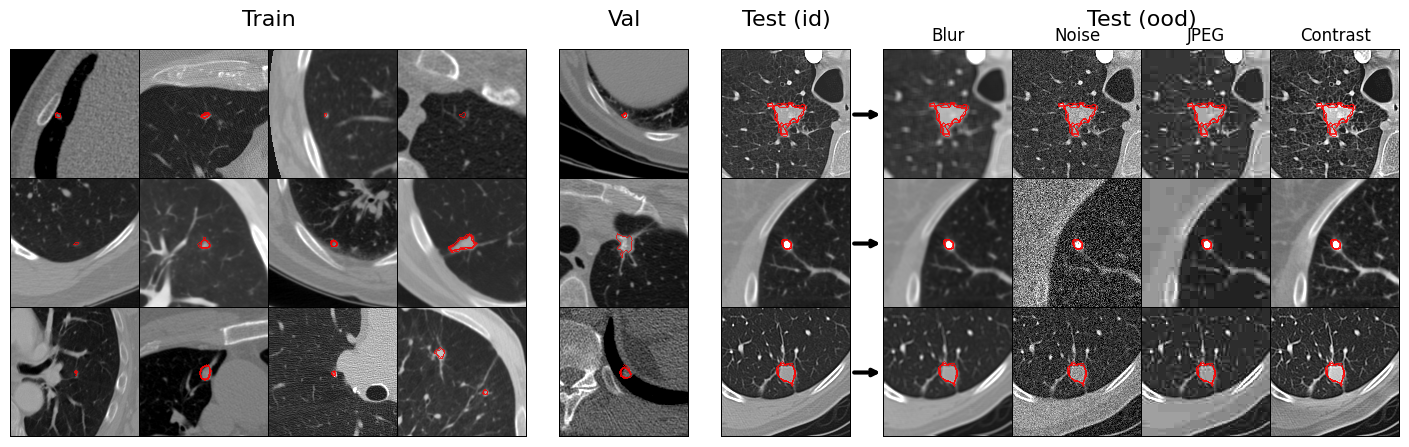

In [169]:
from helpers import plot_lidc
plot_lidc(vmin=-1.5,vmax=3, arrow_width=3, num_label_rows=3, crop_ratio=1.0, label_lw=1,
          save_path="/home/jloch/Desktop/diff/writing/ECCV2026/ECCV_2026_AU_EU/images/lidc.pdf",
          s=1.174154676258993, text_fontsize=[16,12], label_color=(1,0,0,0.75));

Text(0.5, 1.0, 'OOD JPEG')

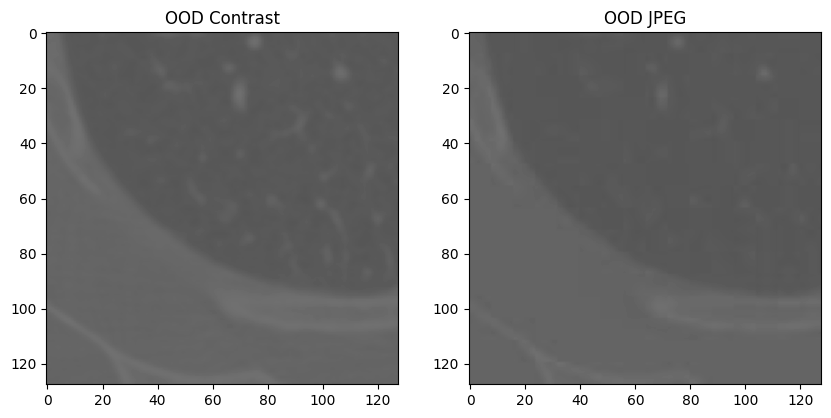

In [126]:
p1 = "/home/jloch/Desktop/diff/luzern/values_datasets/origlidc128/preprocessed/augmented/ood_contrast/images/0913_009.npy"
p2 = "/home/jloch/Desktop/diff/luzern/values_datasets/origlidc128/preprocessed/augmented/ood_jpeg/images/0913_009.npy"
im1 = np.load(p1)
im2 = np.load(p2)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im1, cmap="gray", vmin=-1.5, vmax=3)
plt.title("OOD Contrast")
plt.subplot(1,2,2)
plt.imshow(im2, cmap="gray", vmin=-1.5, vmax=3)
plt.title("OOD JPEG")

/home/jloch/Desktop/diff/luzern/values_datasets/origlidc128/preprocessed/augmented/images/

In [90]:
1290/1291*1.425

1.4238962044926413

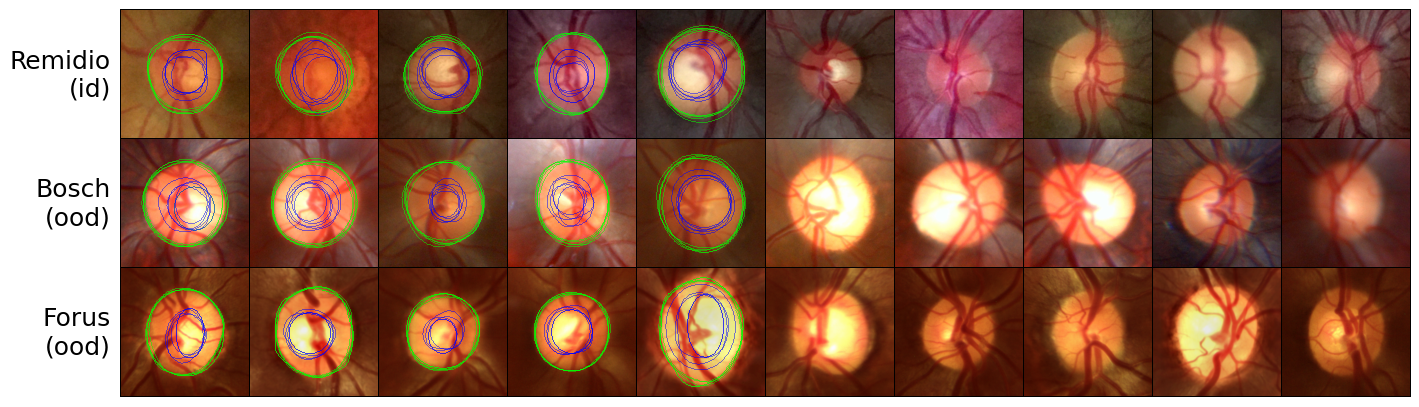

In [94]:
from helpers import plot_chaksu
plot_chaksu(cup_color=(0,0,1),save_path="/home/jloch/Desktop/diff/writing/ECCV2026/ECCV_2026_AU_EU/images/chaksu.pdf",s=1.4238962044926413,
            text_fontsize=18);

In [ ]:

def plot_chaksu(n_rows=3, n_cols=10, scanners=["Remidio","Bosch","Forus"],scanner_titles=["Remidio (id)","Bosch (ood)","Forus (ood)"],
                text_fontsize=16, cup_color=(1,0,0), disc_color=(0,1,0), label_lw=1.0, pad=1, 
                pad_color=(0,0,0), label_cols=5):
    """
    plots a e.g. 3x10 matrix of images from the chaksu dataset. 
    Each row corresponds to a different scanner type, each image is a randomly sampled. 
    The first label_cols columns should have cup and disc segmentation masks overlaid on the images, 
    with cup_color and disc_color respectively, and label_lw as the line width for the labels. 
    (it should also accept 4 color RGBA tuples) 
    There should be pad pixels of pad_color in between images in both vertical and horizontal directions. If pad_pixels is a tuple width 2 elements,
    then it should specify the vertical and horizontal padding separately.
    To the left of each row, there should be a text label with the corresponding scanner title from scanner_titles, using text_fontsize for the font size.
    """